In [1]:
import numpy as np
import pandas as pd
import IPython.display as display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Intrusion.csv")
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df.shape

(25192, 42)

In [5]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [9]:
df=df[['protocol_type', 'service', 'flag', 'src_bytes','is_host_login','is_guest_login', 'count', 'srv_count','rerror_rate', 'srv_rerror_rate', 'same_srv_rate','class']]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   protocol_type    25192 non-null  object 
 1   service          25192 non-null  object 
 2   flag             25192 non-null  object 
 3   src_bytes        25192 non-null  int64  
 4   is_host_login    25192 non-null  int64  
 5   is_guest_login   25192 non-null  int64  
 6   count            25192 non-null  int64  
 7   srv_count        25192 non-null  int64  
 8   rerror_rate      25192 non-null  float64
 9   srv_rerror_rate  25192 non-null  float64
 10  same_srv_rate    25192 non-null  float64
 11  class            25192 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 2.3+ MB


In [11]:
df.describe()

,src_bytes,is_host_login,is_guest_login,count,srv_count,rerror_rate,srv_rerror_rate,same_srv_rate
count,2.519200e+04,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,2.433063e+04,0.0,0.009130,84.591180,27.698754,0.118630,0.120260,0.660559
std,2.410805e+06,0.0,0.095115,114.673451,72.468242,0.318745,0.322335,0.439637
min,0.000000e+00,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.090000
50%,4.400000e+01,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,1.000000
75%,2.790000e+02,0.0,0.000000,144.000000,18.000000,0.000000,0.000000,1.000000
max,3.817091e+08,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000


In [12]:
df

,protocol_type,service,flag,src_bytes,is_host_login,is_guest_login,count,srv_count,rerror_rate,srv_rerror_rate,same_srv_rate,class
0,tcp,ftp_data,SF,491,0,0,2,2,0.0,0.0,1.00,normal
1,udp,other,SF,146,0,0,13,1,0.0,0.0,0.08,normal
2,tcp,private,S0,0,0,0,123,6,0.0,0.0,0.05,anomaly
3,tcp,http,SF,232,0,0,5,5,0.0,0.0,1.00,normal
4,tcp,http,SF,199,0,0,30,32,0.0,0.0,1.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
25187,tcp,exec,RSTO,0,0,0,100,7,1.0,1.0,0.07,anomaly
25188,tcp,ftp_data,SF,334,0,0,1,1,0.0,0.0,1.00,anomaly
25189,tcp,private,REJ,0,0,0,105,7,1.0,1.0,0.07,anomaly
25190,tcp,nnsp,S0,0,0,0,129,18,0.0,0.0,0.14,anomaly


In [21]:
df['protocol_type'].value_counts()

,count
protocol_type,
tcp,20526
udp,3011
icmp,1655


In [22]:
df['class'].value_counts()

,count
class,
normal,13449
anomaly,11743


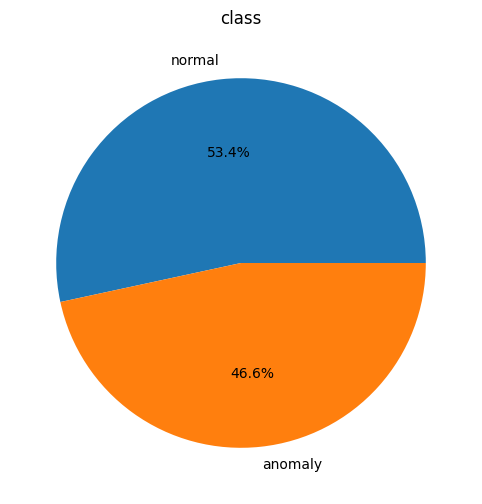

In [15]:
counts = df['class'].value_counts().head(10)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('class')
plt.show()


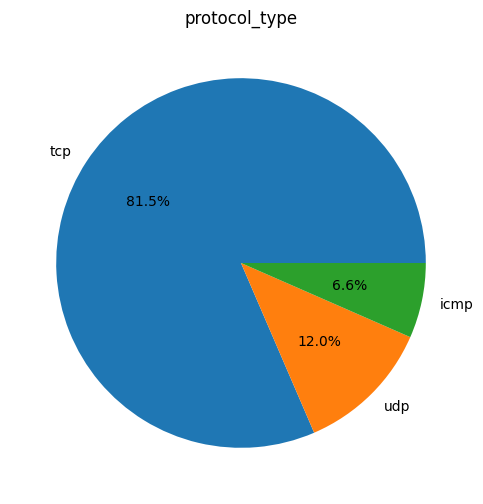

In [14]:
counts = df['protocol_type'].value_counts().head(10)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('protocol_type')
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [17]:
X = df.drop(['class'],axis=1)
y = df['class']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
df.columns

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'class'],
      dtype='object')

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
numeric_features = ['src_bytes', 'is_host_login','is_guest_login', 'count', 'srv_count', 'rerror_rate','srv_rerror_rate', 'same_srv_rate']
categorical_features = ['protocol_type', 'service', 'flag']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

In [24]:
from sklearn.neighbors import KNeighborsClassifier
KNN = Pipeline(steps=[('preprocessor', preprocessor),
                        ('Regressor', KNeighborsClassifier() )])
KNN.fit(X_train, y_train)

# Predict on the test set
y_pred = KNN.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
KNN_score=int(accuracy * 100)
# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9888866838658464
Precision: 0.988889460542461
Recall: 0.9888866838658464
F1 Score: 0.9888855695036599


In [25]:
from sklearn.naive_bayes import MultinomialNB

# Define the pipeline with MultinomialNB (Naive Bayes)
NB_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', MultinomialNB())])

# Fit the model
NB_model.fit(X_train, y_train)

# Predict on the test set
y_pred = NB_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
NB_score = int(accuracy * 100)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.8739829331216511
Precision: 0.8905748810451586
Recall: 0.8739829331216511
F1 Score: 0.8716628545865448


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

# Define the pipeline with DecisionTreeClassifier
DT_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', DecisionTreeClassifier(random_state=42))])

# Fit the model
DT_model.fit(X_train, y_train)

# Predict on the test set
y_pred = DT_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
DT_score = int(accuracy * 100)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9954356023020441
Precision: 0.995436641763482
Recall: 0.9954356023020441
F1 Score: 0.9954357679331666


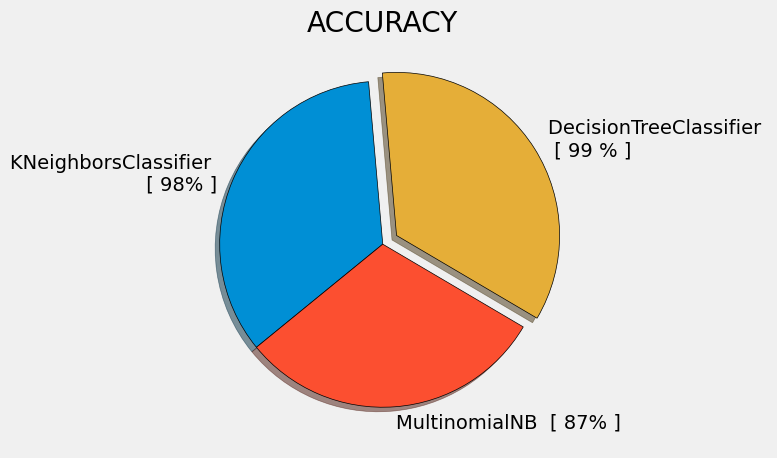

In [27]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Language Popularity
#python is not good with a lot of data so we shall modify our list to top 5 languages.
slices = [KNN_score, NB_score, DT_score]
labels = [f'KNeighborsClassifier \n [ {KNN_score}% ]',f'MultinomialNB  [ {NB_score}% ]',f'DecisionTreeClassifier \n [ {DT_score} % ]']
explode = [0,0, 0.1] #this puts an emphasis on python

plt.pie(slices, labels = labels, explode = explode,
        #shadow = True for asthetics to add a shadow to our plot
        shadow = True,
        #startangle = 90, rotates the original chart by 90 degress
        startangle = 95,
        wedgeprops = {'edgecolor': 'black'})



plt.title('ACCURACY')
plt.tight_layout()
plt.show()

In [28]:
new_data = {
    'protocol_type': 'TCP',
    'service': 'http',
    'flag': 'SF',
    'src_bytes': 4100000,
    'is_host_login': 0,
    'is_guest_login': 0,
    'count': 12200000,
    'srv_count': 8,
    'rerror_rate': 1200,
    'srv_rerror_rate': 2700000,
    'same_srv_rate': 2200000
}

# Convert the input data to a DataFrame
new_df = pd.DataFrame([new_data])

# Make prediction using the trained model
prediction = DT_model.predict(new_df)

# Print the prediction
print(f"Prediction for the input data: {prediction[0]}")


Prediction for the input data: anomaly


In [29]:
df

,protocol_type,service,flag,src_bytes,is_host_login,is_guest_login,count,srv_count,rerror_rate,srv_rerror_rate,same_srv_rate,class
0,tcp,ftp_data,SF,491,0,0,2,2,0.0,0.0,1.00,normal
1,udp,other,SF,146,0,0,13,1,0.0,0.0,0.08,normal
2,tcp,private,S0,0,0,0,123,6,0.0,0.0,0.05,anomaly
3,tcp,http,SF,232,0,0,5,5,0.0,0.0,1.00,normal
4,tcp,http,SF,199,0,0,30,32,0.0,0.0,1.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
25187,tcp,exec,RSTO,0,0,0,100,7,1.0,1.0,0.07,anomaly
25188,tcp,ftp_data,SF,334,0,0,1,1,0.0,0.0,1.00,anomaly
25189,tcp,private,REJ,0,0,0,105,7,1.0,1.0,0.07,anomaly
25190,tcp,nnsp,S0,0,0,0,129,18,0.0,0.0,0.14,anomaly


In [30]:
new_data = {
    'protocol_type': 'TCP',
    'service': 'http',
    'flag': 'SF',
    'src_bytes': 199,
    'is_host_login': 0,
    'is_guest_login': 0,
    'count': 30,
    'srv_count': 32,
    'rerror_rate': 0,
    'srv_rerror_rate': 0,
    'same_srv_rate': 1
}

# Convert the input data to a DataFrame
new_df = pd.DataFrame([new_data])

# Make prediction using the trained model
prediction = DT_model.predict(new_df)

# Print the prediction
print(f"Prediction for the input data: {prediction[0]}")


Prediction for the input data: normal


In [31]:
import pickle
DT_filename = 'DT.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_filename, 'wb')
pickle.dump(DT_model, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()